In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [4]:
cola = pd.read_excel("C:\\Users\\jhishna2022\\Downloads\\CocaCola_Sales_Rawdata.xlsx")
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## EDA

In [5]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
cola.shape

(42, 2)

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Visualization

#### We will extract Quarter values and Year values separately from 'Quarter column'

In [9]:
cola['Quarters'] = 0
cola['Year'] = 0
for i in range(42):
    p = cola["Quarter"][i]
    cola['Quarters'][i]= p[0:2]
    cola['Year'][i]= p[3:5]

In [10]:
cola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


### Creating dummy variables for quarters

In [11]:
q_dummies = pd.DataFrame(pd.get_dummies(cola['Quarters']))
cola = pd.concat([cola,q_dummies],axis = 1)
cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


### Lineplot

<AxesSubplot:>

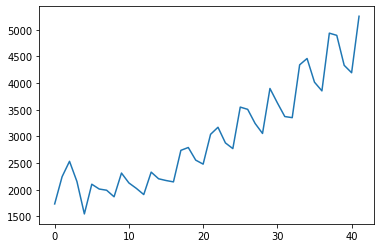

In [12]:
cola.Sales.plot()

<AxesSubplot:>

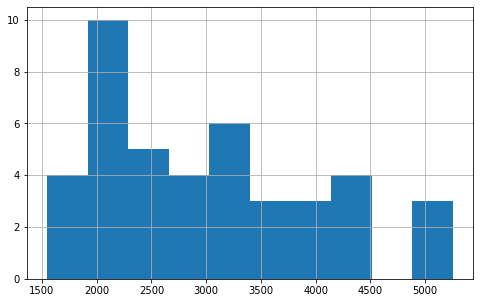

In [13]:
cola['Sales'].hist(figsize=(8,5))

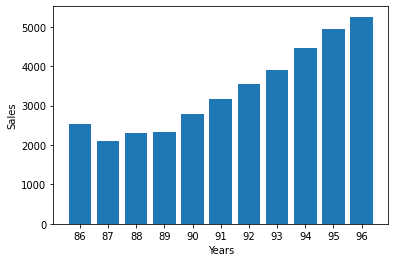

In [14]:
plt.xlabel('Years')
plt.ylabel('Sales')
plt.bar(cola['Year'],cola['Sales'])
plt.show()

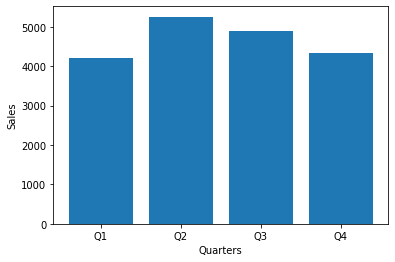

In [15]:
plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.bar(cola['Quarters'],cola['Sales'])
plt.show()

### Lag-plot

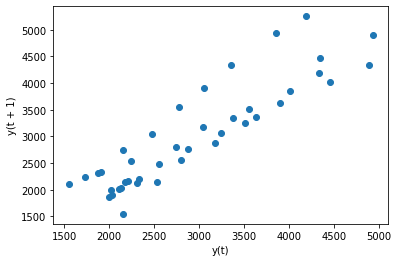

In [16]:
from pandas.plotting import lag_plot
lag_plot(cola['Sales'])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

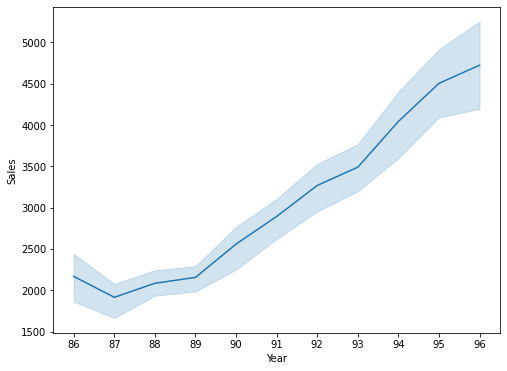

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year",y="Sales",data=cola)

<AxesSubplot:>

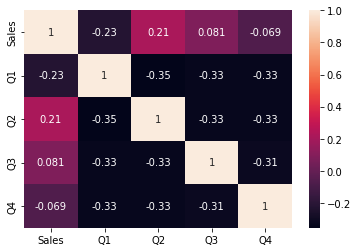

In [18]:
sns.heatmap(cola.corr(),annot=True)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

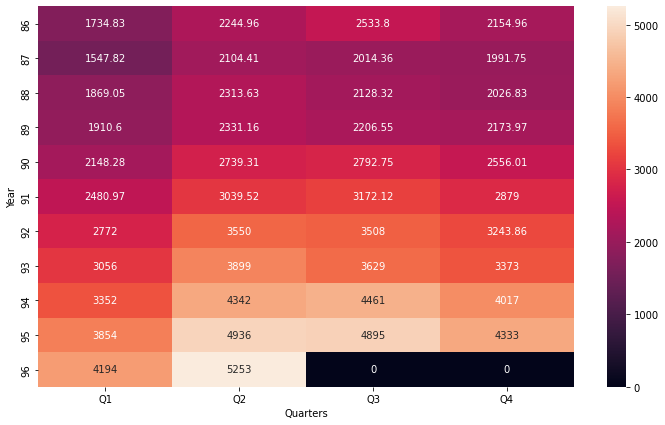

In [19]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

### ACF plots and PACF plots

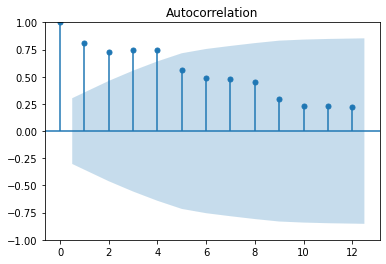

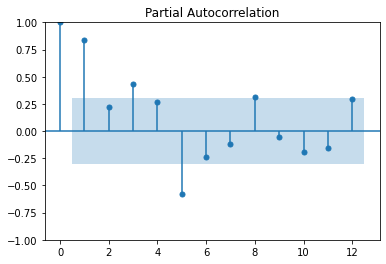

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

In [21]:
len(cola['Sales'])

42

### Splitting data

In [22]:
Train = cola.head(33)
Test = cola.tail(9)

In [23]:
range(2,10,2)


range(2, 10, 2)

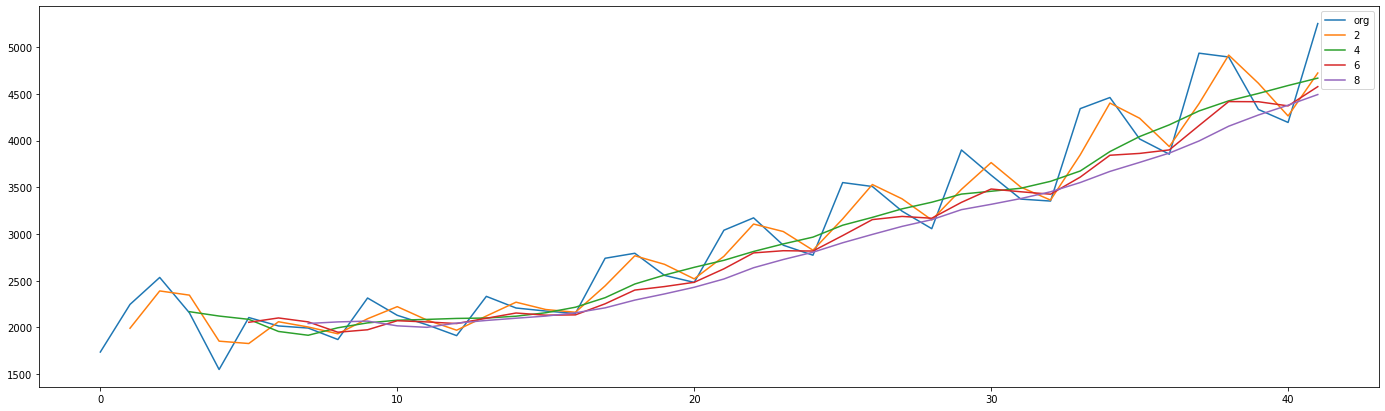

In [24]:
plt.figure(figsize=(24,7))
cola.Sales.plot(label="org")
for i in range(2,10,2):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time Series Decomposition Plot

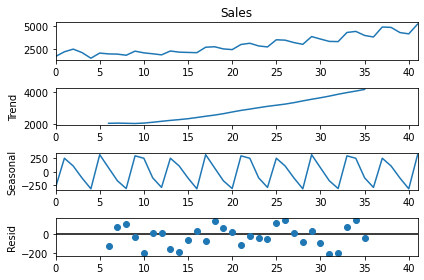

In [25]:
decompose_ts_add = seasonal_decompose(cola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## Evaluation Metics

### RMSE

In [26]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## Different Forecasting methods is used

### Simple exponential Method

In [27]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
ses_model_error = np.sqrt(np.mean((np.array(Test.Sales)-np.array(pred_ses))**2))
print('RMSE is: ',np.sqrt(np.mean((np.array(Test.Sales)-np.array(pred_ses))**2)))

RMSE is:  1229.5210813225028


### Holt method 

In [28]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
hw_model_error = RMSE(Test.Sales,pred_hw)
print('RMSE is: ',RMSE(Test.Sales,pred_hw))

RMSE is:  1135.34621449086


### Holts winter exponential smoothing with additive seasonality and additive trend

In [29]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_add_add_error = RMSE(Test.Sales,pred_hwe_add_add) 
hwe_model_add_add_error

615.1736922642737

### Holts winter exponential smoothing with multipliative seasonality and additive trend

In [30]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
hwe_model_mul_add_error = RMSE(Test.Sales,pred_hwe_mul_add)
hwe_model_mul_add_error

486.2067759853033

### Auto-Regression Model

In [31]:
from statsmodels.tsa.ar_model import AutoReg

In [39]:
X= pd.read_excel("C:\\Users\\jhishna2022\\Downloads\\CocaCola_Sales_Rawdata.xlsx",index_col=0,parse_dates=True)
#Y =X.values
#Y

In [40]:
X1 = X.values

In [41]:
X1

array([[1734.82699966],
       [2244.96099854],
       [2533.80499268],
       [2154.96299744],
       [1547.81899643],
       [2104.41199493],
       [2014.36299896],
       [1991.74699783],
       [1869.04999924],
       [2313.63199615],
       [2128.31999969],
       [2026.82899857],
       [1910.60399628],
       [2331.16499329],
       [2206.54999542],
       [2173.96799469],
       [2148.27799988],
       [2739.30799866],
       [2792.7539978 ],
       [2556.00999451],
       [2480.97399902],
       [3039.522995  ],
       [3172.11599731],
       [2879.00099945],
       [2772.        ],
       [3550.        ],
       [3508.        ],
       [3243.85999298],
       [3056.        ],
       [3899.        ],
       [3629.        ],
       [3373.        ],
       [3352.        ],
       [4342.        ],
       [4461.        ],
       [4017.        ],
       [3854.        ],
       [4936.        ],
       [4895.        ],
       [4333.        ],
       [4194.        ],
       [5253.   

In [44]:
X.shape

(42, 1)

<AxesSubplot:xlabel='Quarter'>

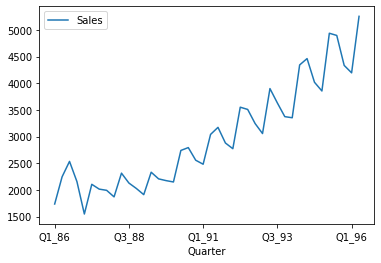

In [45]:
X.plot()

In [46]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(cola['Sales'],autolag='AIC')
print('p-value ',dftest[1])
print('No. of lags ',dftest[2])

p-value  0.9966611673930905
No. of lags  7


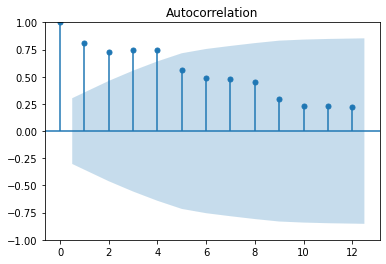

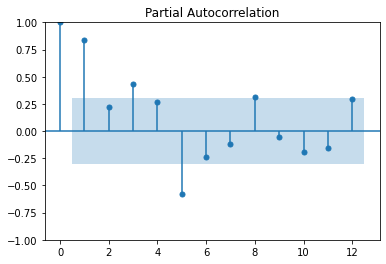

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

In [48]:
train1 = X1[:len(X)-7]
test1 = X1[len(X)-7:]

In [49]:
model = AutoReg(train1, lags=4).fit()

In [50]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   35
Model:                     AutoReg(4)   Log Likelihood                -208.348
Method:               Conditional MLE   S.D. of innovations            200.732
Date:                Mon, 08 Aug 2022   AIC                            428.696
Time:                        19:49:24   BIC                            437.300
Sample:                             4   HQIC                           431.501
                                   35                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -339.4433    171.598     -1.978      0.048    -675.769      -3.118
y.L1           0.2902      0.119      2.442      0.015       0.057       0.523
y.L2          -0.0588      0.135     -0.437      0.6

In [51]:
print(len(train1))

35


##### Making prediction on test set and compare

In [52]:
pre = model.predict(start=len(train1),end=len(X1)-1,dynamic=False)

[3975.25013677 3938.26371769 4805.10456911 5095.88372081 4715.50242728
 4669.52831694 5446.19067678]


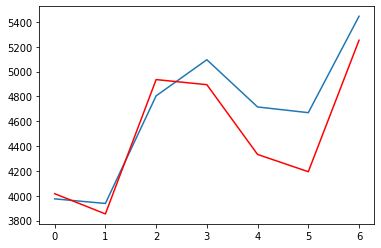

In [53]:
plt.plot(pre)
plt.plot(test1,color='red')
print(pre)

In [71]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(test1,pre))
#rmse_autoreg = RMSE(test1,pre)
rmse_autoreg

260.7925374149422

### Building Time series ARIMA Model

In [55]:
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [ ]:
!pip install pmdarima

In [56]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [57]:
stepwise_fit =auto_arima(cola['Sales'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=592.020, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=560.355, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=558.572, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=555.524, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=554.244, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=575.252, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=555.874, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=558.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -271.122
Date:                Mon, 08 Aug 2022   AIC                            554.244
Time:                        19:51:26   BIC                            564.525
Sample:                             0   HQIC                           557.988
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     74.7093     34.601      2.159      0.031       6.893     142.526
ar.L1         -0.2579      0.132     -1.957      0.050      -0.516       0.000
ar.L2         -0.3024      0.125     -2.421      0.015      -0.547      -0.058
ar.L3         -0.2228      0.155     -1.442      0.149      -0.526       0.080
ar.L4          0.6648      0.124      5.361      0.000       0.422       0.908
sigma2      2.752e+04   6154.250      4.472      0.000    1.55e+04    3.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.64   Prob(JB):                         0.13
Heteroskedasticity (H):               0.56   Skew:                            -0.38
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
print(X.shape)
train2 = X[:-7]
test2 = X[-7:]

(42, 1)


In [61]:
modela = ARIMA(train2['Sales'],order=(4,1,0))
modela = modela.fit()
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   35
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -228.563
Date:                Mon, 08 Aug 2022   AIC                            467.125
Time:                        19:54:28   BIC                            474.757
Sample:                             0   HQIC                           469.728
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0766      0.089     -0.858      0.391      -0.252       0.098
ar.L2         -0.1251      0.112     -1.115      0.265      -0.345       0.095
ar.L3         -0.0425      0.113     -0.377      0.706      -0.263       0.178
ar.L4          0.8201      0.110      7.477      0.000       0.605       1.035
sigma2      3.184e+04   8193.470      3.887      0.000    1.58e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.92   Prob(JB):                         0.94
Heteroskedasticity (H):               0.69   Skew:                            -0.15
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### make predictions on test data

In [63]:
start=len(train2)
end=len(train2)+len(test2)-1
pred_arima = modela.predict(start=start,end=end,typ='levels')
#print(pred_arima)
pred_arima.index=X.index[start:end+1]
print(pred_arima)

Quarter
Q4_94    4118.939026
Q1_95    4070.970369
Q2_95    4924.280192
Q3_95    4977.010431
Q4_95    4587.703017
Q1_96    4535.340770
Q2_96    5285.618528
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Quarter'>

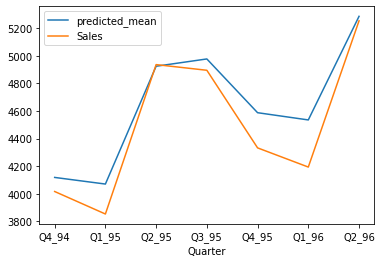

In [64]:
pred_arima.plot(legend=True)
test2['Sales'].plot(legend=True)

In [65]:
test2['Sales'].mean()

4497.428571428572

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_arima = sqrt(mean_squared_error(test2,pred_arima))

In [70]:
rmse_arima

187.76196462202435

#### Data Processing for linear regression models

In [72]:
cola["t"] = np.arange(1,43)
cola["t_squared"] = cola["t"]*cola["t"]

cola["log_sales"] = np.log(cola["Sales"])

cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


#### Split data into train nd test

In [73]:
train = cola.head(33)
test = cola.tail(9)

## Linear Models

In [75]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear_model = RMSE(test['Sales'], pred_linear)
rmse_linear_model

811.0635934509897

In [76]:
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp_model = RMSE(test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

646.8116922622048

In [77]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
rmse_Quad_model

423.1005737527196

##### Additive Seasonality

In [78]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3','Q4']]))
rmse_add_sea = RMSE(test['Sales'], pred_add_sea)
rmse_add_sea

1884.9697647455075

#### Additive Seasonality Quadratic

In [79]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model   

225.94379798406607

#### Multiplicative Seasonality

In [80]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mul_sea = RMSE(test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1947.3794193190079

#### Multiplicative Additive Seasonality

In [81]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mul_Add_sea = RMSE(test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

432.64468120801763

In [82]:
list = [['Simple Exponential Method',ses_model_error], ['Holt method',hw_model_error],
          ['HW exp smoothing add',hwe_model_add_add_error],['HW exp smoothing mult',hwe_model_mul_add_error],
        ['Auto Regression Model',rmse_autoreg],['ARIMA Model',rmse_arima],
          ['Linear Model',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['Add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1229.521081
1,Holt method,1135.346214
2,HW exp smoothing add,615.173692
3,HW exp smoothing mult,486.206776
4,Auto Regression Model,260.792537
5,ARIMA Model,187.761965
6,Linear Model,811.063593
7,Exp model,646.811692
8,Quad model,423.100574
9,Add seasonality,1884.969765


- Error is lowest for ARIMA Model, so we will use ARIMA Model

## Forecast

### Final Model with least RMSE value

##### Fitting the given sales values on Arima model

In [84]:
modela2 = ARIMA(cola['Sales'],order=(4,1,0))
modela2 = modela2.fit()
X.tail()

,Sales
Quarter,
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


#### Making Prediction/Forecast of next 6 quarters

In [85]:
start=len(cola)
end=len(cola)+5
predictions_future = modela2.predict(start=len(cola),end=end, typ='levels')
b= pd.Series(predictions_future)
a = pd.DataFrame({'Quaters':['Q3_96','Q4_96','Q1_97','Q2_97','Q3_97','Q4_97'],'Sales_predictions':b})
a

,Quaters,Sales_predictions
42,Q3_96,5162.110543
43,Q4_96,4567.152514
44,Q1_97,4460.996143
45,Q2_97,5434.852830
46,Q3_97,5309.432364
47,Q4_97,4701.050373


# These are the predictions for the next 6 quarters. 